**Milestone 2:**

In [98]:
#import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report ,roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import accuracy_score  
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedRandomForestClassifier
from scipy.stats import chi2_contingency, f_oneway
from sklearn.model_selection import train_test_split, GridSearchCV
import lightgbm as lgb
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [99]:
#read the dataset depression
df=pd.read_csv("Project Data.csv")
df_encoded=pd.read_csv("cleaned_data.csv")

In [100]:
#know datatype of data
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Numeric Columns:", numeric_columns)
print("Categorical Columns:", categorical_columns)

Numeric Columns: ['id', 'Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction', 'Work/Study Hours', 'Financial Stress', 'Social Isolation', 'Bullying', 'Family Issues', 'Uncertain Future', 'Social Media Usage', 'Drug/Smoking', 'Daily Coffee Intake', 'PHQ-9', 'Cortisol_Level', 'Depression']
Categorical Columns: ['Gender', 'City', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness', 'Favorite Color', 'Pet Ownership', 'Music Genre Preference']


Data Analysis:

In [101]:
df.head()

,id,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,...,Uncertain Future,Social Media Usage,Drug/Smoking,Favorite Color,Pet Ownership,Daily Coffee Intake,Music Genre Preference,PHQ-9,Cortisol_Level,Depression
0,2,Male,23.0,Visakhapatnam,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,...,1,2,1,Green,No,1,Pop,10,6.655000,1
1,8,Female,24.0,Bangalore,2.0,5.90,5.0,5-6 hours,Moderate,BSc,...,2,4,1,Yellow,No,1,Rock,4,5.123958,0
2,26,Male,17.0,Srinagar,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,...,1,5,0,Yellow,Yes,2,Pop,4,4.190609,0
3,30,Female,17.0,Varanasi,3.0,5.59,2.0,7-8 hours,Moderate,BCA,...,2,1,1,Black,Yes,4,Classical,9,7.467984,1
4,32,Female,25.0,Jaipur,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,...,1,1,1,Blue,No,4,Pop,9,0.406585,0


In [102]:
df_encoded.head()

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,...,Uncertain Future,Social Media Usage,Drug/Smoking,Favorite Color,Pet Ownership,Daily Coffee Intake,Music Genre Preference,PHQ-9,Cortisol_Level,Depression
0,1,23.0,51,5.0,8.97,2.0,0,0,3,1,...,1,2,1,2,0,1,3,10,6.655000,1
1,0,24.0,3,2.0,5.90,5.0,0,1,10,0,...,2,4,1,4,0,1,4,4,5.123958,0
2,1,17.0,44,3.0,7.03,5.0,2,0,5,0,...,1,5,0,4,1,2,3,4,4.190609,0
3,0,17.0,49,3.0,5.59,2.0,1,1,7,1,...,2,1,1,0,1,4,0,9,7.467984,1
4,0,25.0,16,4.0,8.13,3.0,0,1,16,1,...,1,1,1,1,0,4,3,9,0.406585,0


In [103]:
# standardization
from sklearn.preprocessing import StandardScaler

depression = df_encoded["Depression"]
df_encoded.drop("Depression", axis=1, inplace=True)

scaler = StandardScaler()
standardized_data = scaler.fit_transform(df_encoded)
df_standardized = pd.DataFrame(standardized_data, columns=df_encoded.columns)
df_standardized["Depression"] = depression
df_standardized.head()

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,...,Uncertain Future,Social Media Usage,Drug/Smoking,Favorite Color,Pet Ownership,Daily Coffee Intake,Music Genre Preference,PHQ-9,Cortisol_Level,Depression
0,0.891373,0.740244,1.510523,1.345456,0.893354,-0.693539,-1.421814,-1.182432,-1.042063,0.761634,...,-1.409488,-0.711510,1.002512,-0.003847,-0.996422,-0.704880,0.719349,0.647035,0.955627,1
1,-1.121865,1.116908,-1.424206,-0.826195,-1.194113,1.510565,-1.421814,-0.375754,0.116922,-1.312967,...,-0.703681,0.702086,1.002512,1.408253,-0.996422,-0.704880,1.425312,-0.518447,0.360493,0
2,0.891373,-1.519737,1.082541,-0.102311,-0.425762,1.510565,0.459507,-1.182432,-0.710924,-1.312967,...,-1.409488,1.408884,-0.997494,1.408253,1.003591,0.005885,0.719349,-0.518447,-0.002310,0
3,-1.121865,-1.519737,1.388242,-0.102311,-1.404899,-0.693539,-0.481154,-0.375754,-0.379786,0.761634,...,-0.703681,-1.418308,1.002512,-1.415947,1.003591,1.427416,-1.398539,0.452788,1.271643,1
4,-1.121865,1.493571,-0.629384,0.621573,0.322191,0.041162,-1.421814,-0.375754,1.110337,0.761634,...,-1.409488,-1.418308,1.002512,-0.709897,-0.996422,1.427416,0.719349,0.452788,-1.473204,0


In [104]:
# normalization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df_encoded)
df_normalized = pd.DataFrame(normalized_data, columns=df_encoded.columns)
df_normalized["Depression"] = depression
df_normalized.head()

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,...,Uncertain Future,Social Media Usage,Drug/Smoking,Favorite Color,Pet Ownership,Daily Coffee Intake,Music Genre Preference,PHQ-9,Cortisol_Level,Depression
0,1.0,0.777778,1.000000,1.0,0.897,0.4,0.00,0.000000,0.130435,1.0,...,0.00,0.25,1.0,0.50,0.0,0.25,0.75,0.50,0.665532,1
1,0.0,0.888889,0.058824,0.4,0.590,1.0,0.00,0.333333,0.434783,0.0,...,0.25,0.75,1.0,1.00,0.0,0.25,1.00,0.20,0.512419,0
2,1.0,0.111111,0.862745,0.6,0.703,1.0,0.50,0.000000,0.217391,0.0,...,0.00,1.00,0.0,1.00,1.0,0.50,0.75,0.20,0.419078,0
3,0.0,0.111111,0.960784,0.6,0.559,0.4,0.25,0.333333,0.304348,1.0,...,0.25,0.00,1.0,0.00,1.0,1.00,0.00,0.45,0.746836,1
4,0.0,1.000000,0.313725,0.8,0.813,0.6,0.00,0.333333,0.695652,1.0,...,0.00,0.00,1.0,0.25,0.0,1.00,0.75,0.45,0.040653,0


In [105]:
df_encoded["Depression"] = depression
df_encoded.head()

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,...,Uncertain Future,Social Media Usage,Drug/Smoking,Favorite Color,Pet Ownership,Daily Coffee Intake,Music Genre Preference,PHQ-9,Cortisol_Level,Depression
0,1,23.0,51,5.0,8.97,2.0,0,0,3,1,...,1,2,1,2,0,1,3,10,6.655000,1
1,0,24.0,3,2.0,5.90,5.0,0,1,10,0,...,2,4,1,4,0,1,4,4,5.123958,0
2,1,17.0,44,3.0,7.03,5.0,2,0,5,0,...,1,5,0,4,1,2,3,4,4.190609,0
3,0,17.0,49,3.0,5.59,2.0,1,1,7,1,...,2,1,1,0,1,4,0,9,7.467984,1
4,0,25.0,16,4.0,8.13,3.0,0,1,16,1,...,1,1,1,1,0,4,3,9,0.406585,0


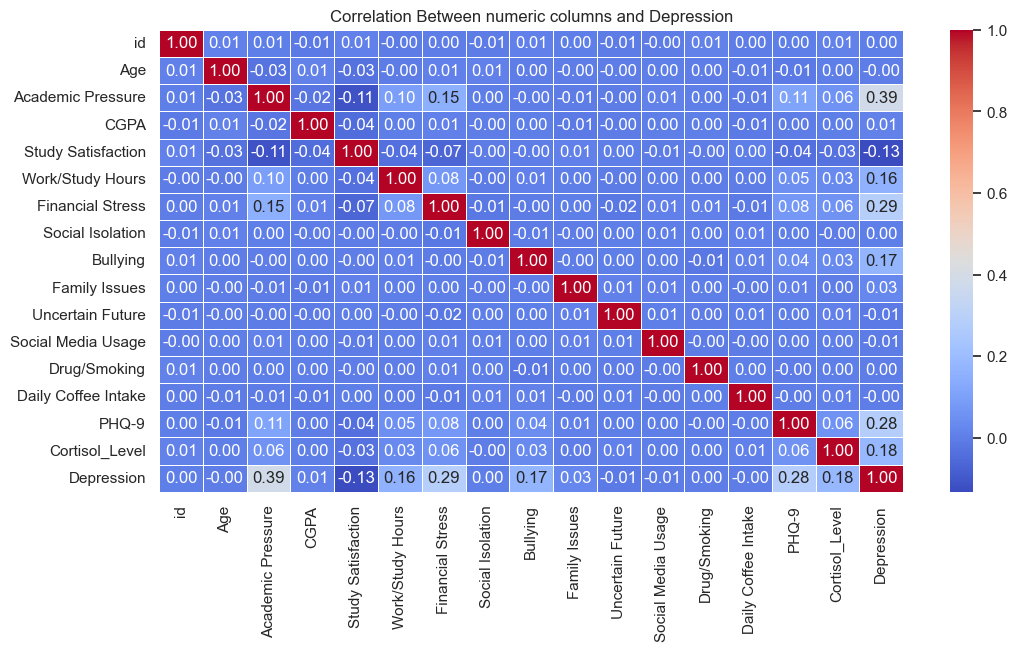

In [106]:
# correlation matrix
plt.figure(figsize=(12,6))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between numeric columns and Depression")
plt.show()

In [107]:
# Hypothesis Testing
results = {}

for col in categorical_columns:
    contingency_table = pd.crosstab(df[col], df["Depression"])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    results[col] = p

for col, p_value in results.items():
    print(f"Chi-Square Test for {col} vs Depression: p-value = {p_value:.4f}")

    if p_value < 0.05:
        print(f"🔴 Significant Relationship! {col} is likely related to Depression.\n")
    else:
        print(f"🟢 No Significant Relationship. {col} is NOT strongly related to Depression.\n")

Chi-Square Test for Gender vs Depression: p-value = 0.8347
🟢 No Significant Relationship. Gender is NOT strongly related to Depression.

Chi-Square Test for City vs Depression: p-value = 0.0000
🔴 Significant Relationship! City is likely related to Depression.

Chi-Square Test for Sleep Duration vs Depression: p-value = 0.0000
🔴 Significant Relationship! Sleep Duration is likely related to Depression.

Chi-Square Test for Dietary Habits vs Depression: p-value = 0.0000
🔴 Significant Relationship! Dietary Habits is likely related to Depression.

Chi-Square Test for Degree vs Depression: p-value = 0.0000
🔴 Significant Relationship! Degree is likely related to Depression.

Chi-Square Test for Have you ever had suicidal thoughts ? vs Depression: p-value = 0.0000
🔴 Significant Relationship! Have you ever had suicidal thoughts ? is likely related to Depression.

Chi-Square Test for Family History of Mental Illness vs Depression: p-value = 0.0000
🔴 Significant Relationship! Family History of Me

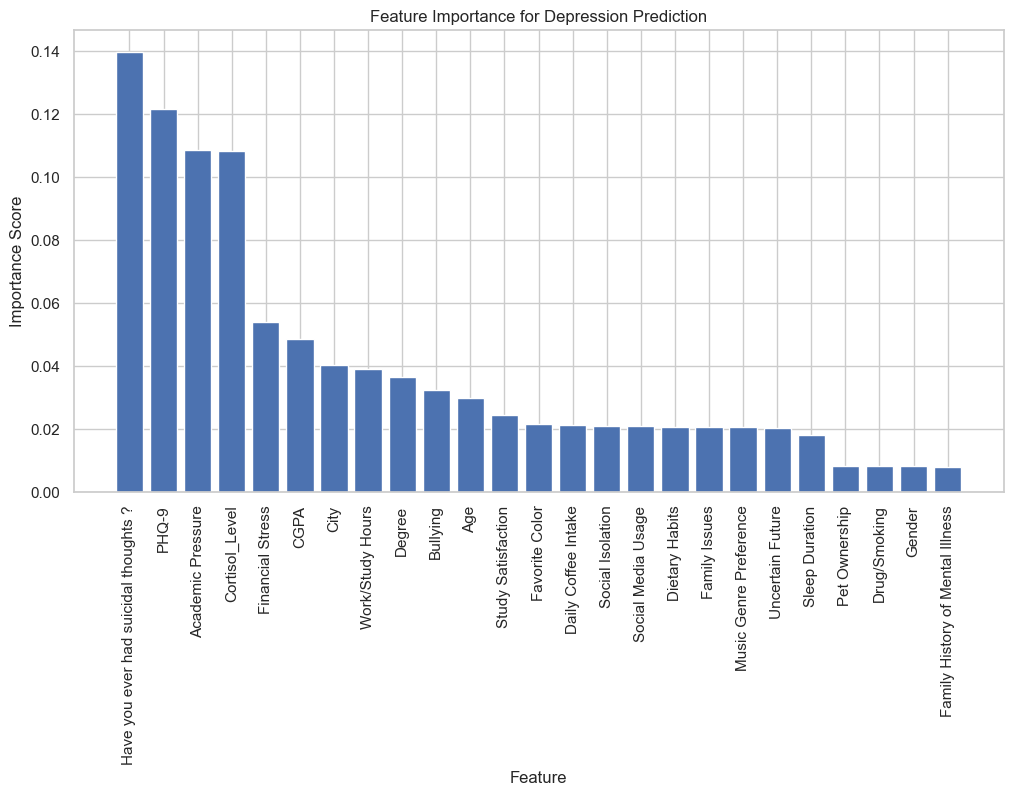

In [108]:
# feature importance by Random Forest

# Define features (X) and target (y)
X = df_encoded.drop(columns=['Depression'])  # Remove unnecessary columns
y = df_encoded['Depression']  # Target variable

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importance scores
importances = model.feature_importances_
feature_names = X.columns

# Sort features by importance
sorted_indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(12,6))
plt.title("Feature Importance for Depression Prediction")
plt.bar(range(len(importances)), importances[sorted_indices], align="center")
plt.xticks(range(len(importances)), np.array(feature_names)[sorted_indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.show()

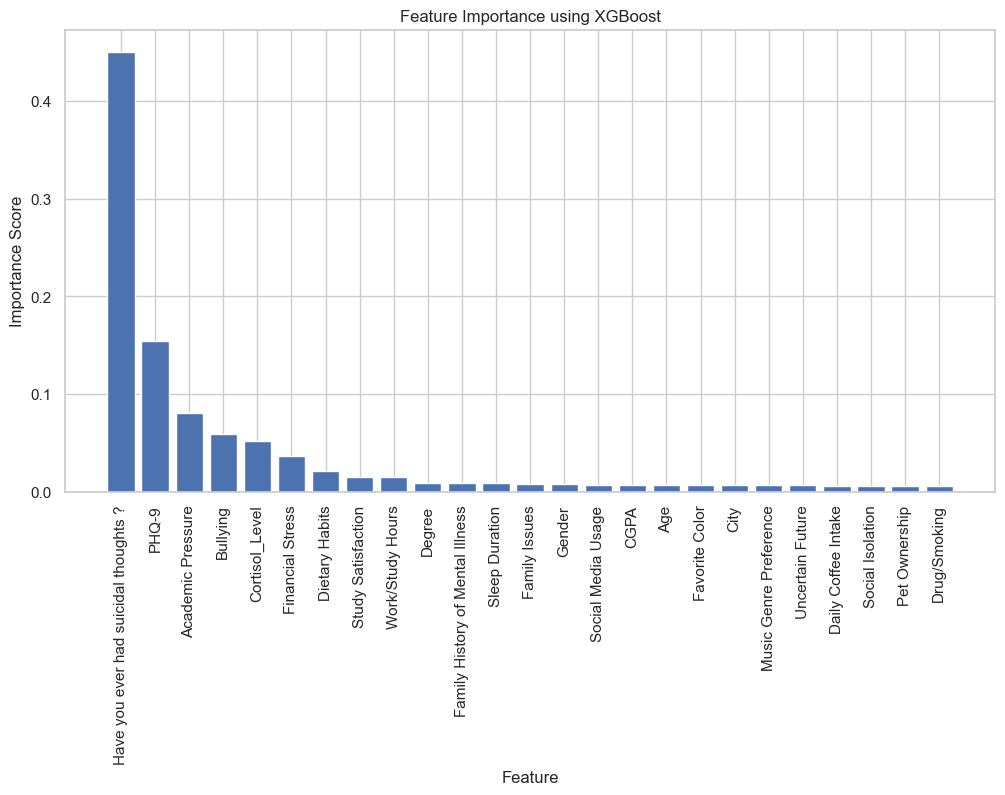

In [109]:
# feature importance by XGBoost


# Define features and target variable
X = df_encoded.drop(columns=['Depression'])  # Remove unnecessary columns
y = df_encoded['Depression']

# Split dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost classifier
model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Get feature importance scores
importances = model.feature_importances_
feature_names = X.columns

# Sort features by importance
sorted_indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(12,6))
plt.title("Feature Importance using XGBoost")
plt.bar(range(len(importances)), importances[sorted_indices], align="center")
plt.xticks(range(len(importances)), np.array(feature_names)[sorted_indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.show()

Data Visualization

In [110]:
df.head()

,id,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,...,Uncertain Future,Social Media Usage,Drug/Smoking,Favorite Color,Pet Ownership,Daily Coffee Intake,Music Genre Preference,PHQ-9,Cortisol_Level,Depression
0,2,Male,23.0,Visakhapatnam,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,...,1,2,1,Green,No,1,Pop,10,6.655000,1
1,8,Female,24.0,Bangalore,2.0,5.90,5.0,5-6 hours,Moderate,BSc,...,2,4,1,Yellow,No,1,Rock,4,5.123958,0
2,26,Male,17.0,Srinagar,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,...,1,5,0,Yellow,Yes,2,Pop,4,4.190609,0
3,30,Female,17.0,Varanasi,3.0,5.59,2.0,7-8 hours,Moderate,BCA,...,2,1,1,Black,Yes,4,Classical,9,7.467984,1
4,32,Female,25.0,Jaipur,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,...,1,1,1,Blue,No,4,Pop,9,0.406585,0


In [111]:
df["Have you ever had suicidal thoughts ?"].unique()

array(['Yes', 'No'], dtype=object)

In [112]:
categorical_columns

['Gender',
 'City',
 'Sleep Duration',
 'Dietary Habits',
 'Degree',
 'Have you ever had suicidal thoughts ?',
 'Family History of Mental Illness',
 'Favorite Color',
 'Pet Ownership',
 'Music Genre Preference']

In [113]:
numeric_columns

['id',
 'Age',
 'Academic Pressure',
 'CGPA',
 'Study Satisfaction',
 'Work/Study Hours',
 'Financial Stress',
 'Social Isolation',
 'Bullying',
 'Family Issues',
 'Uncertain Future',
 'Social Media Usage',
 'Drug/Smoking',
 'Daily Coffee Intake',
 'PHQ-9',
 'Cortisol_Level',
 'Depression']

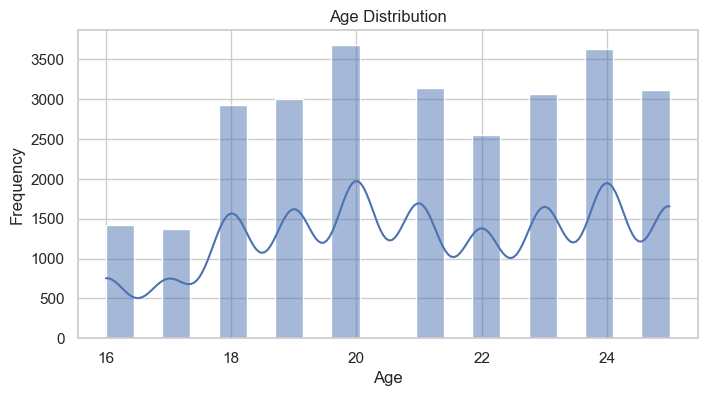

In [114]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

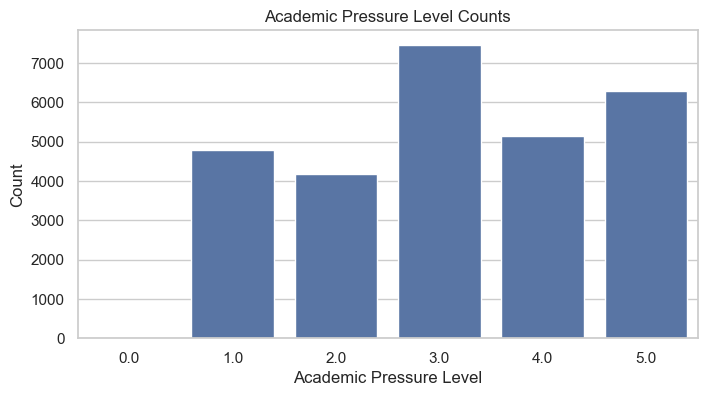

In [115]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Academic Pressure')
plt.title('Academic Pressure Level Counts')
plt.xlabel('Academic Pressure Level')
plt.ylabel('Count')
plt.show()

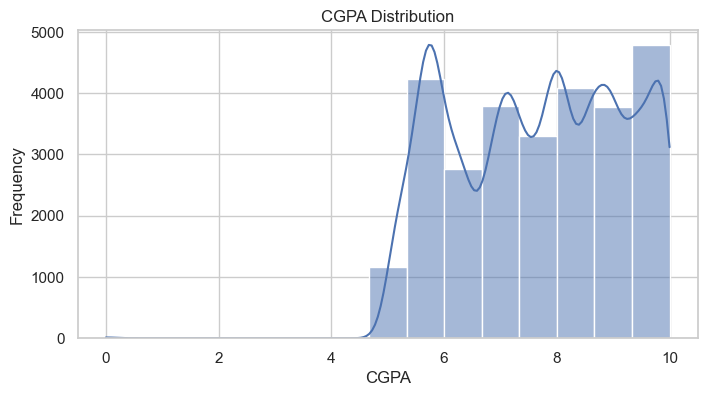

In [116]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='CGPA', bins=15, kde=True)
plt.title('CGPA Distribution')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.show()

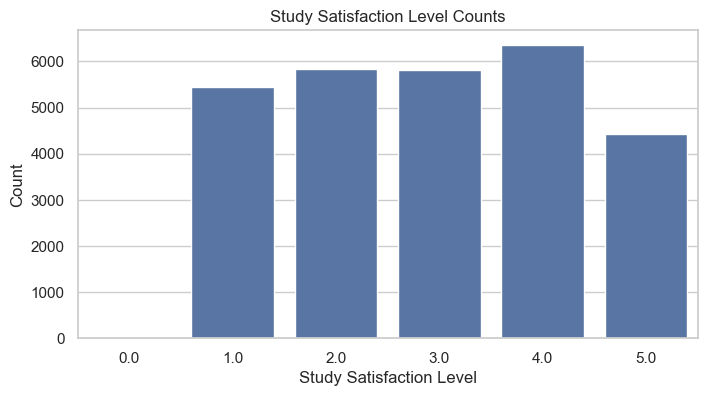

In [117]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Study Satisfaction')
plt.title('Study Satisfaction Level Counts')
plt.xlabel('Study Satisfaction Level')
plt.ylabel('Count')
plt.show()

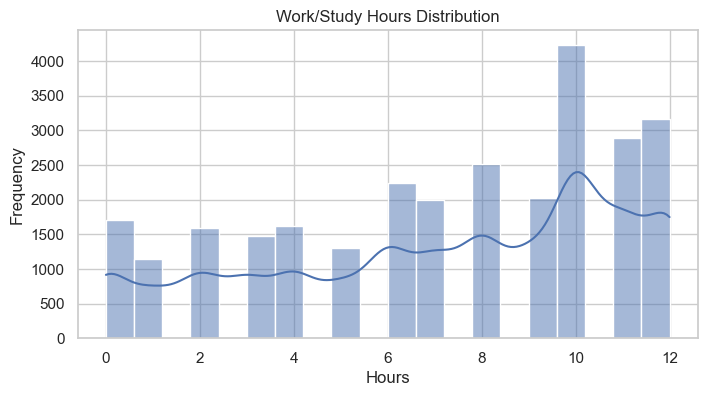

In [118]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Work/Study Hours', bins=20, kde=True)
plt.title('Work/Study Hours Distribution')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.show()

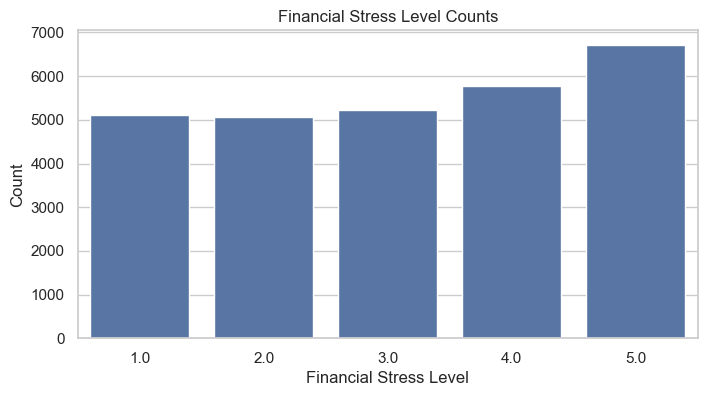

In [119]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Financial Stress')
plt.title('Financial Stress Level Counts')
plt.xlabel('Financial Stress Level')
plt.ylabel('Count')
plt.show()

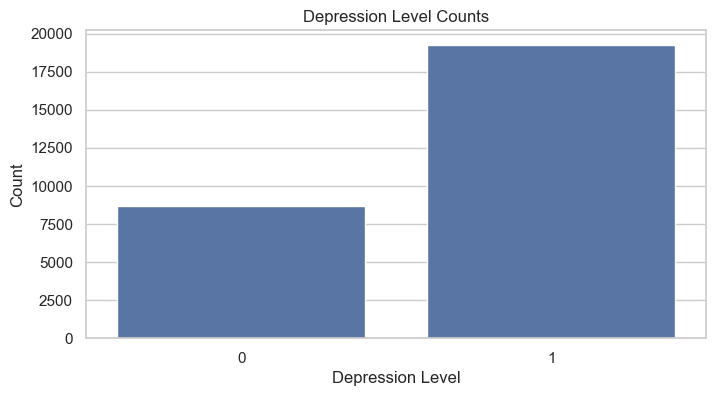

In [120]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Depression')
plt.title('Depression Level Counts')
plt.xlabel('Depression Level')
plt.ylabel('Count')
plt.show()

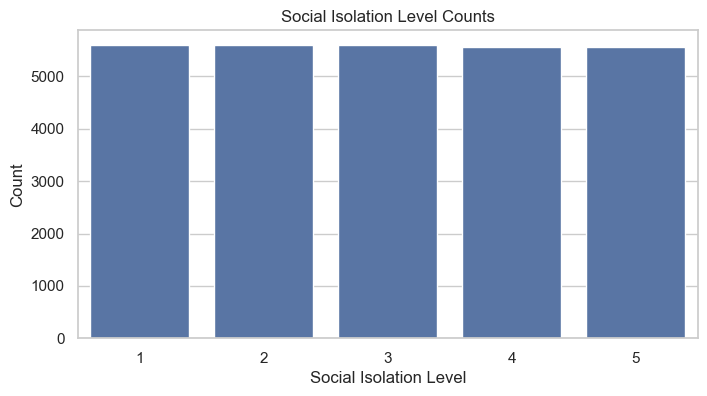

In [121]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Social Isolation')
plt.title('Social Isolation Level Counts')
plt.xlabel('Social Isolation Level')
plt.ylabel('Count')
plt.show()

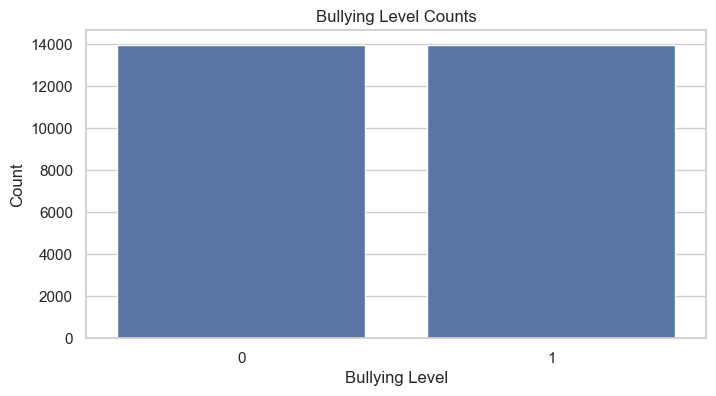

In [122]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Bullying')
plt.title('Bullying Level Counts')
plt.xlabel('Bullying Level')
plt.ylabel('Count')
plt.show()

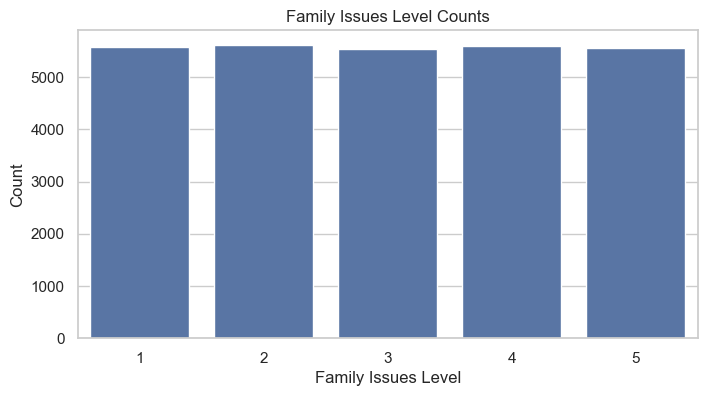

In [123]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Family Issues')
plt.title('Family Issues Level Counts')
plt.xlabel('Family Issues Level')
plt.ylabel('Count')
plt.show()

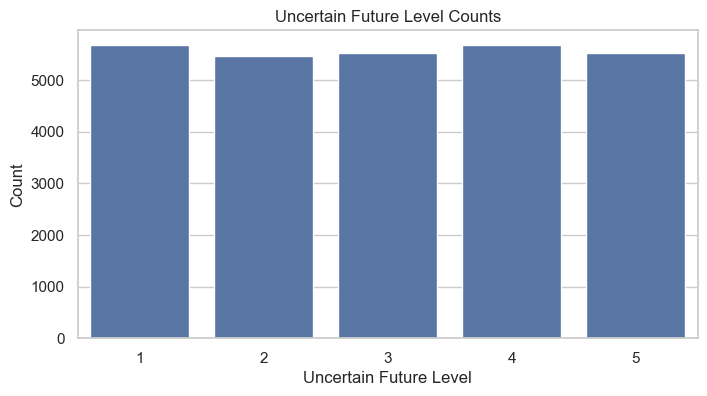

In [124]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Uncertain Future')
plt.title('Uncertain Future Level Counts')
plt.xlabel('Uncertain Future Level')
plt.ylabel('Count')
plt.show()

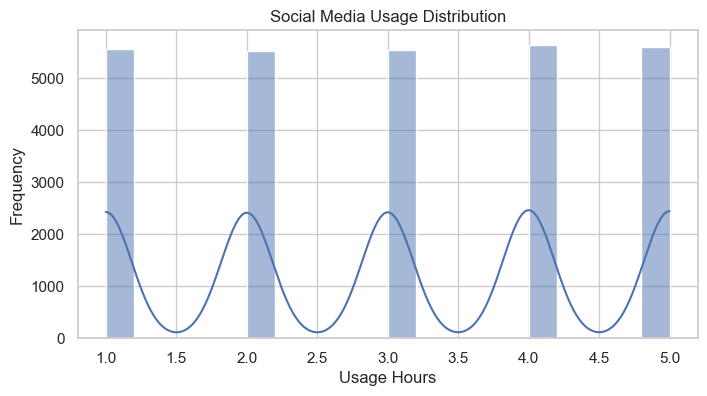

In [125]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Social Media Usage', bins=20, kde=True)
plt.title('Social Media Usage Distribution')
plt.xlabel('Usage Hours')
plt.ylabel('Frequency')
plt.show()

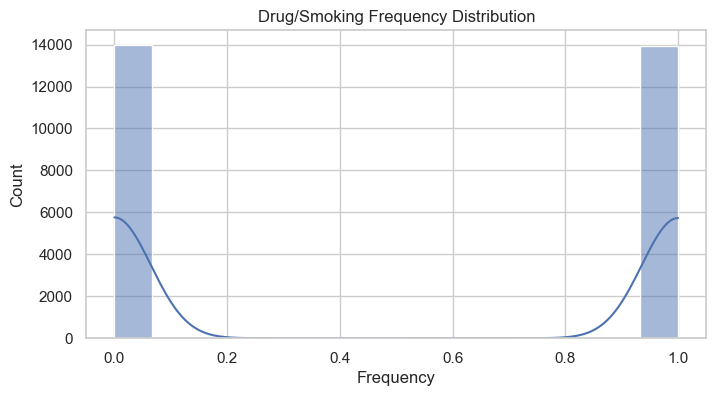

In [126]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Drug/Smoking', bins=15, kde=True)
plt.title('Drug/Smoking Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.show()

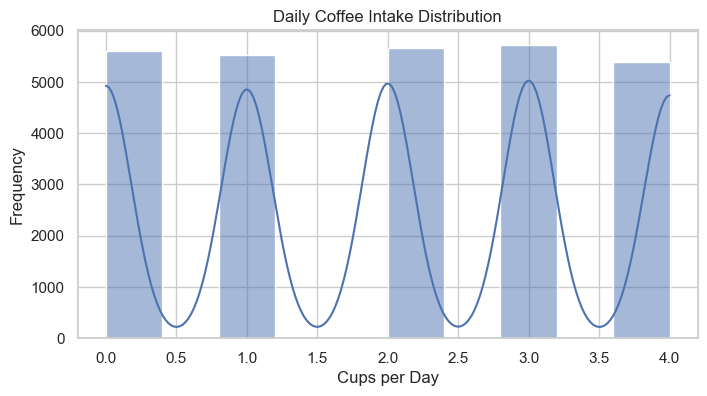

In [127]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Daily Coffee Intake', bins=10, kde=True)
plt.title('Daily Coffee Intake Distribution')
plt.xlabel('Cups per Day')
plt.ylabel('Frequency')
plt.show()

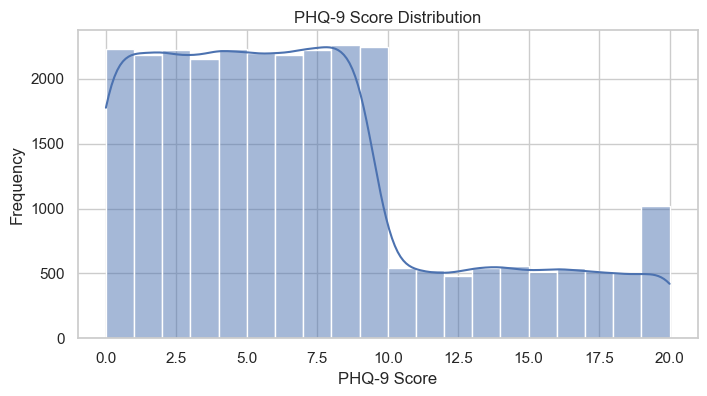

In [128]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='PHQ-9', bins=20, kde=True)
plt.title('PHQ-9 Score Distribution')
plt.xlabel('PHQ-9 Score')
plt.ylabel('Frequency')
plt.show()

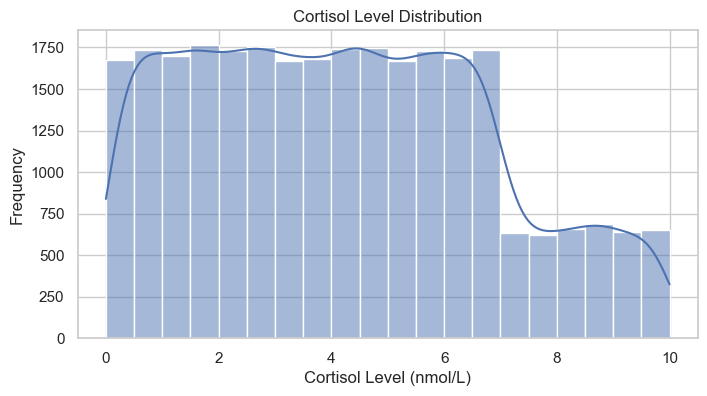

In [129]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Cortisol_Level', bins=20, kde=True)
plt.title('Cortisol Level Distribution')
plt.xlabel('Cortisol Level (nmol/L)')
plt.ylabel('Frequency')
plt.show()

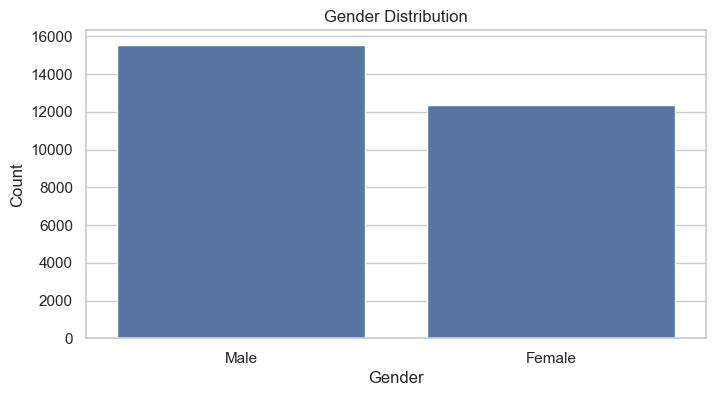

In [130]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

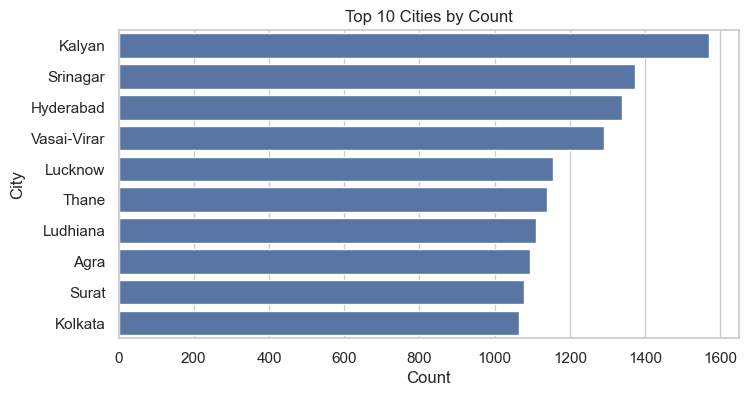

In [131]:
plt.figure(figsize=(8, 4))
city_counts = df['City'].value_counts().head(10)  # Top 10 cities
sns.barplot(x=city_counts.values, y=city_counts.index)
plt.title('Top 10 Cities by Count')
plt.xlabel('Count')
plt.ylabel('City')
plt.show()

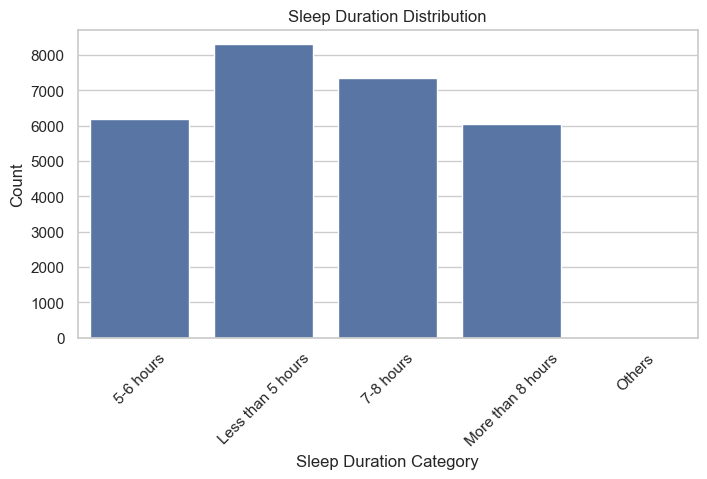

In [132]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Sleep Duration')
plt.title('Sleep Duration Distribution')
plt.xlabel('Sleep Duration Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

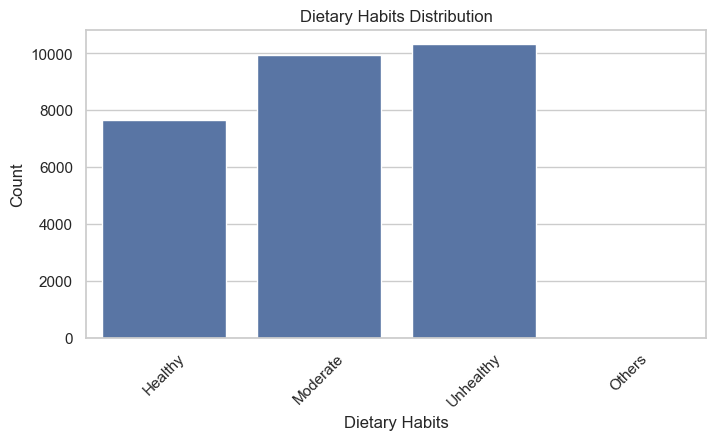

In [133]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Dietary Habits')
plt.title('Dietary Habits Distribution')
plt.xlabel('Dietary Habits')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

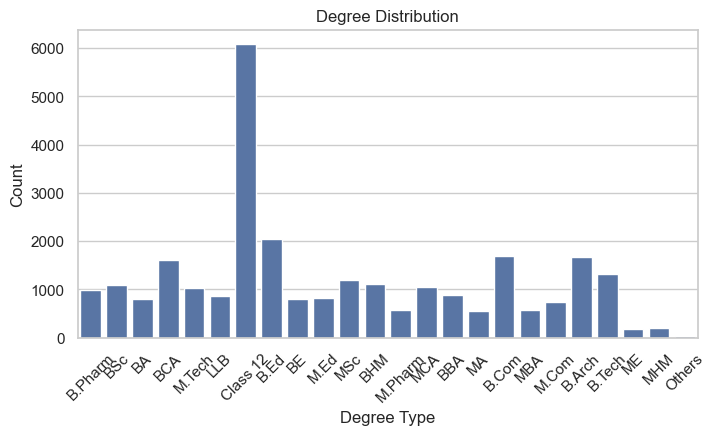

In [134]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Degree')
plt.title('Degree Distribution')
plt.xlabel('Degree Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

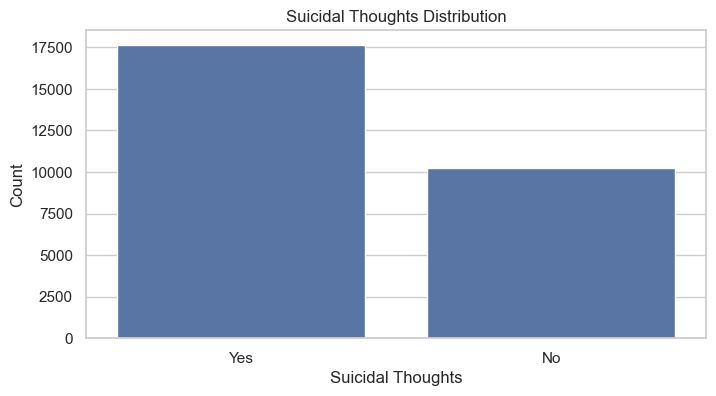

In [135]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Have you ever had suicidal thoughts ?')
plt.title('Suicidal Thoughts Distribution')
plt.xlabel('Suicidal Thoughts')
plt.ylabel('Count')
plt.show()

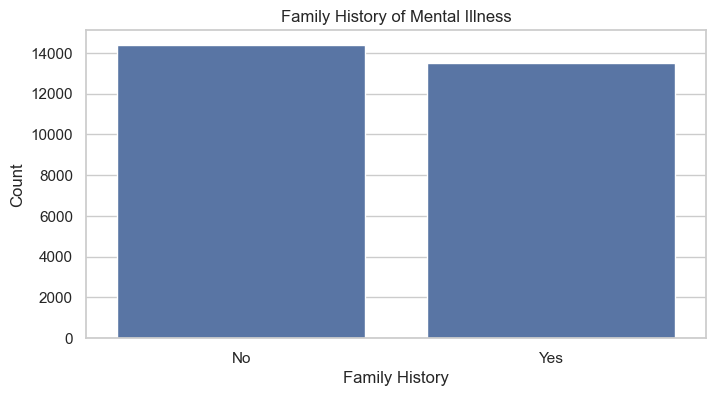

In [136]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Family History of Mental Illness')
plt.title('Family History of Mental Illness')
plt.xlabel('Family History')
plt.ylabel('Count')
plt.show()

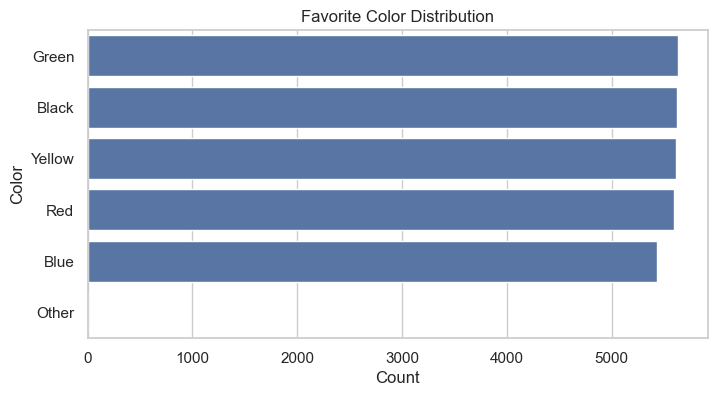

In [137]:
plt.figure(figsize=(8, 4))
color_counts = df['Favorite Color'].value_counts()
# Group rare colors into "Other"
color_counts = color_counts[color_counts >= 5]
color_counts['Other'] = df['Favorite Color'].value_counts()[df['Favorite Color'].value_counts() < 5].sum()
sns.barplot(x=color_counts.values, y=color_counts.index)
plt.title('Favorite Color Distribution')
plt.xlabel('Count')
plt.ylabel('Color')
plt.show()

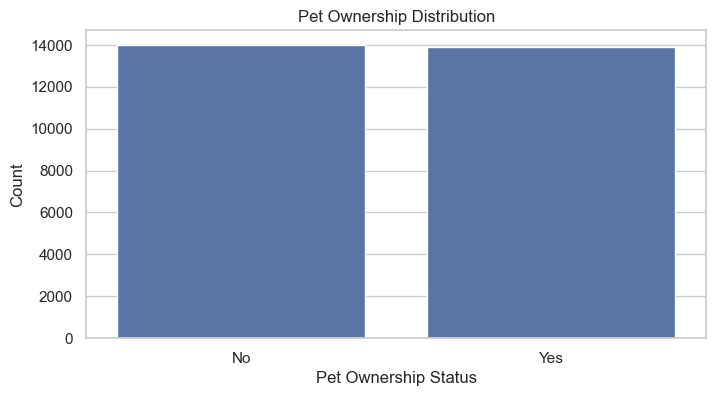

In [138]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Pet Ownership')
plt.title('Pet Ownership Distribution')
plt.xlabel('Pet Ownership Status')
plt.ylabel('Count')
plt.show()

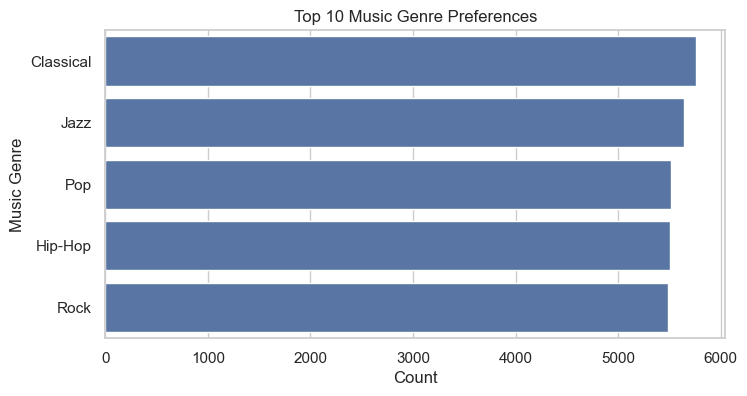

In [139]:
plt.figure(figsize=(8, 4))
genre_counts = df['Music Genre Preference'].value_counts().head(10)  # Top 10 genres
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title('Top 10 Music Genre Preferences')
plt.xlabel('Count')
plt.ylabel('Music Genre')
plt.show()

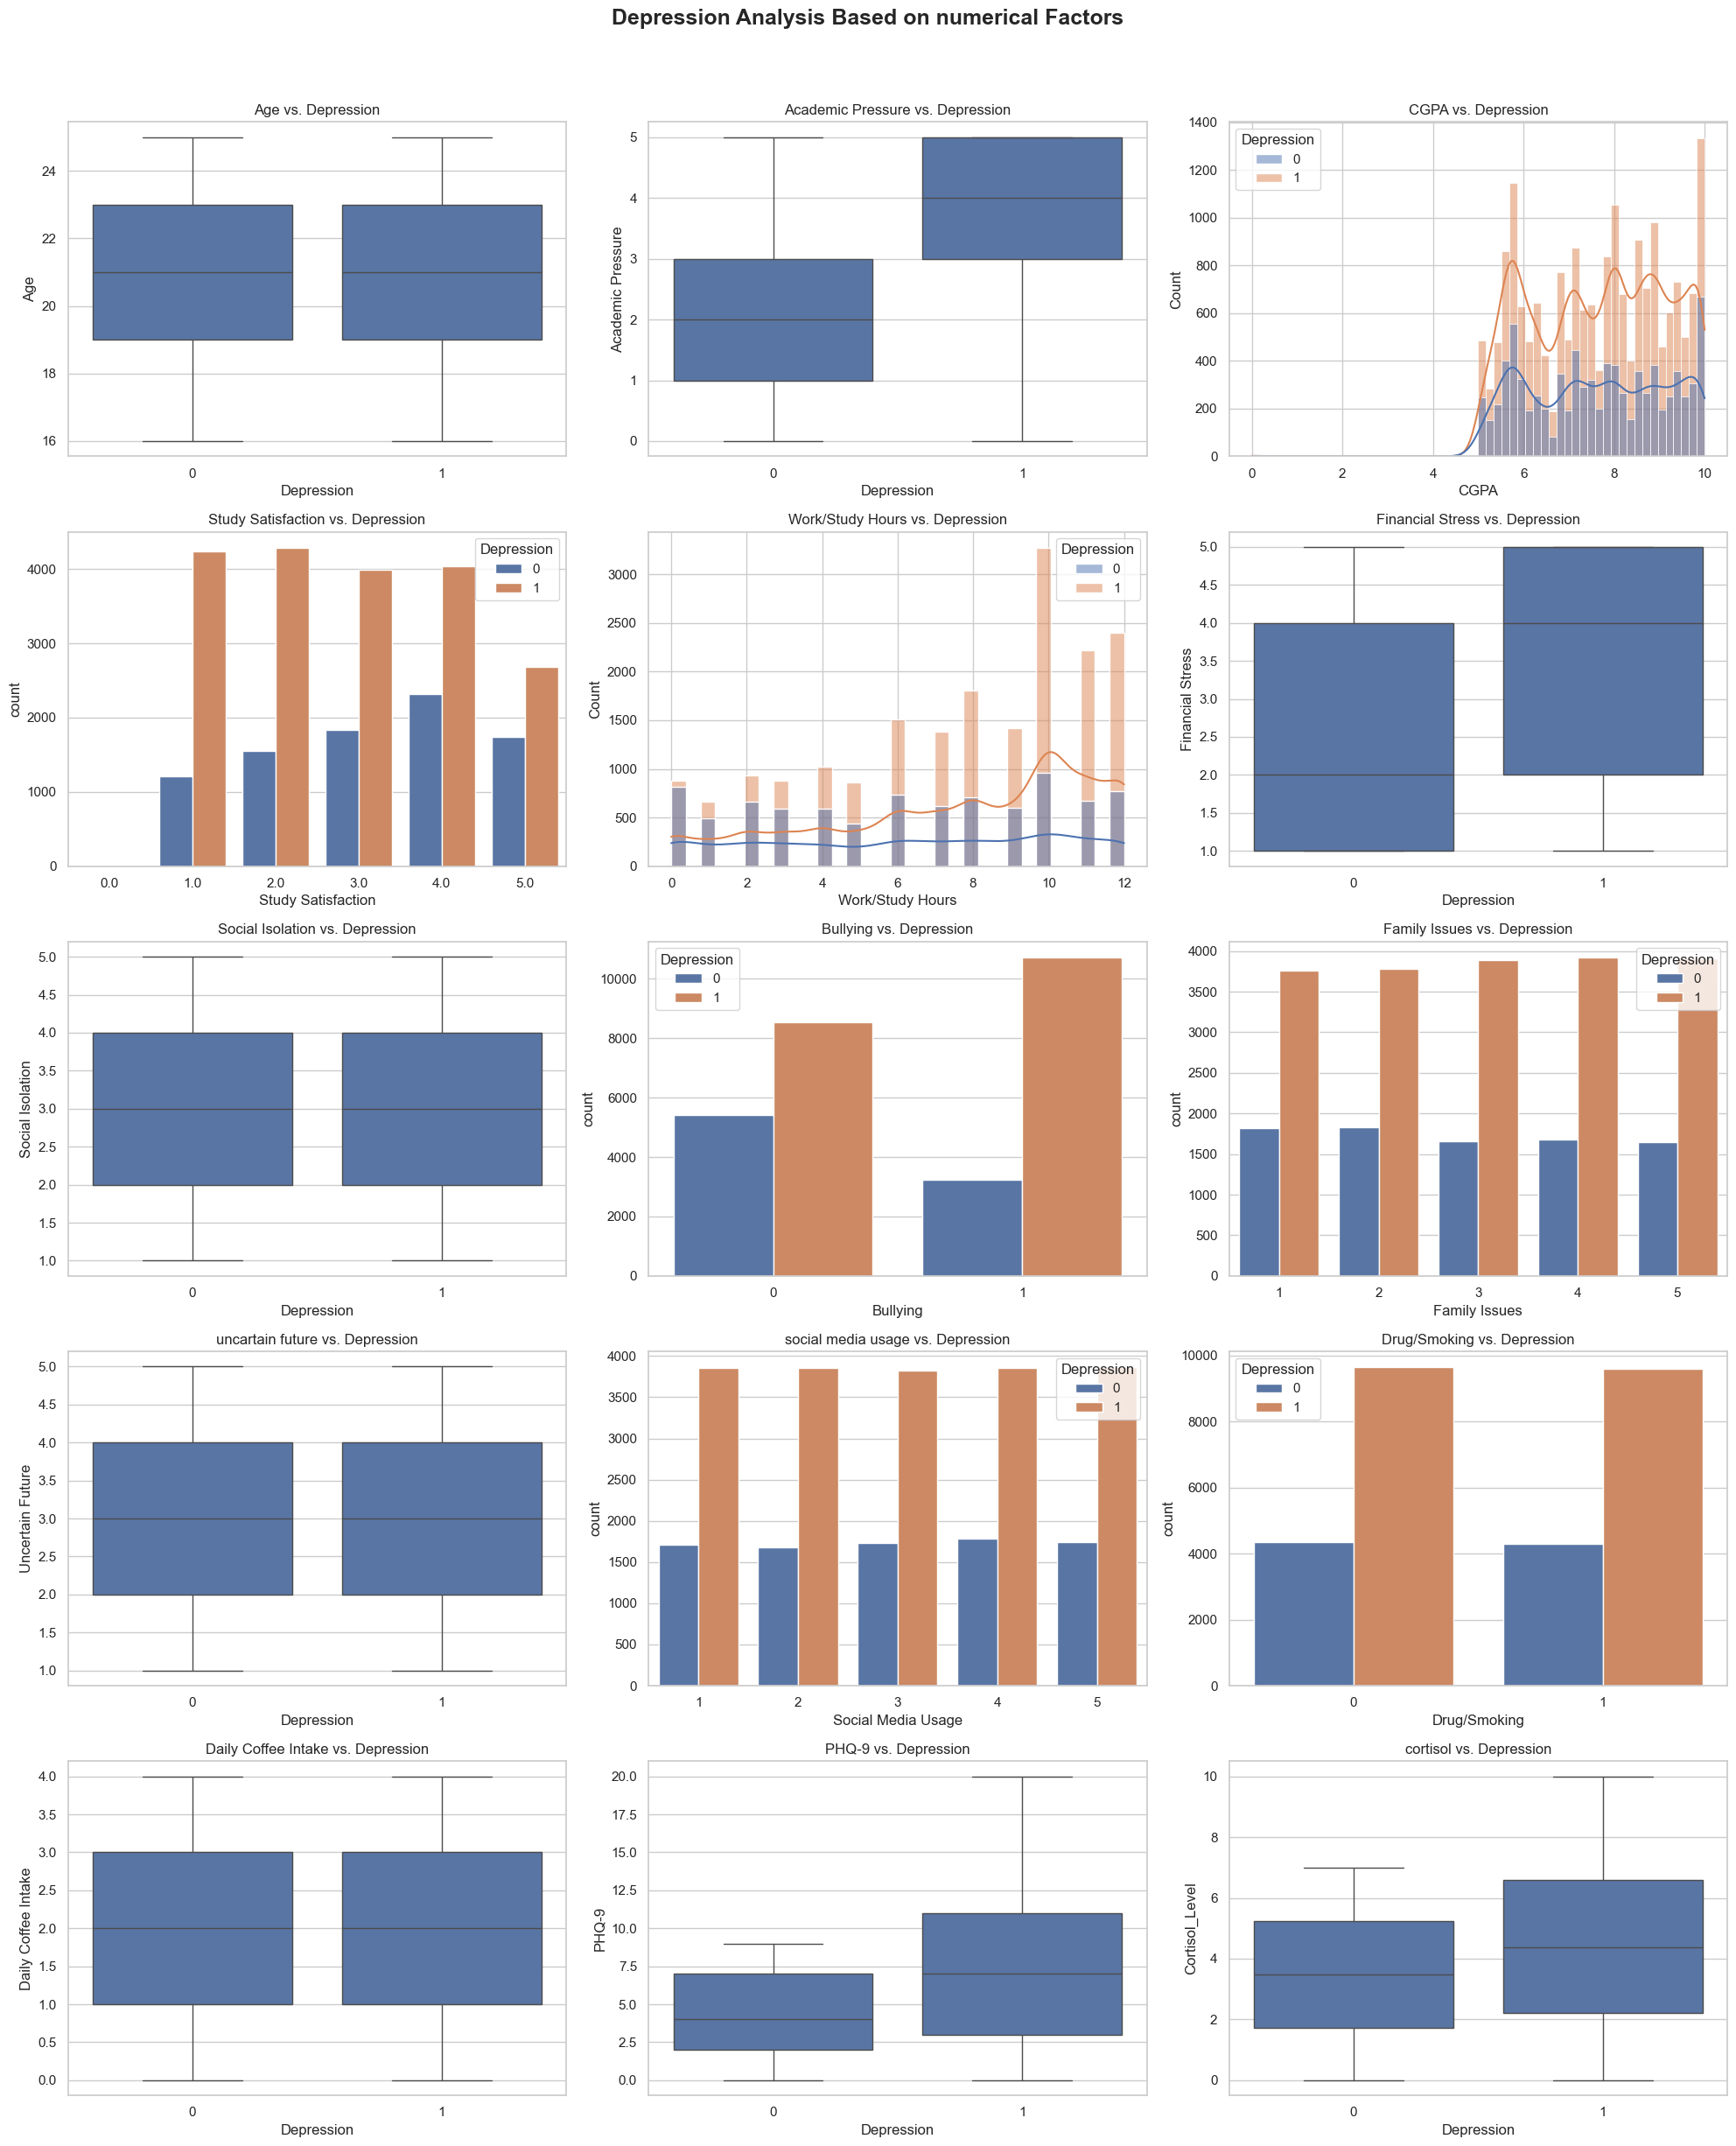

In [140]:
# Set up the figure size and style
sns.set(style="whitegrid")
fig, axes = plt.subplots(5, 3, figsize=(20, 25))  # 5 rows, 3 columns of subplots
fig.suptitle("Depression Analysis Based on numerical Factors", fontsize=18, fontweight='bold')

# 1. Age vs. Depression (Box Plot)
sns.boxplot(x="Depression", y="Age", data=df, ax=axes[0, 0])
axes[0, 0].set_title("Age vs. Depression")

# 2. Academic Pressure vs. Depression (Box Plot)
sns.boxplot(x="Depression", y="Academic Pressure", data=df, ax=axes[0, 1])
axes[0, 1].set_title("Academic Pressure vs. Depression")

# 3. CGPA vs. Depression (Histogram)
sns.histplot(data=df, x="CGPA", hue="Depression", kde=True, ax=axes[0, 2])
axes[0, 2].set_title("CGPA vs. Depression")

# 4. Study Satisfaction vs. Depression (Bar Chart)
sns.countplot(x="Study Satisfaction", hue="Depression", data=df, ax=axes[1, 0])
axes[1, 0].set_title("Study Satisfaction vs. Depression")

# 5. Work/Study Hours vs. Depression (Histogram)
sns.histplot(data=df, x="Work/Study Hours", hue="Depression", kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Work/Study Hours vs. Depression")

# 6. Financial Stress vs. Depression (Box Plot)
sns.boxplot(x="Depression", y="Financial Stress", data=df, ax=axes[1, 2])
axes[1, 2].set_title("Financial Stress vs. Depression")

# 7. Social Isolation vs. Depression (Box Plot)
sns.boxplot(x="Depression", y="Social Isolation", data=df, ax=axes[2, 0])
axes[2, 0].set_title("Social Isolation vs. Depression")

# 8. Bullying vs. Depression (Bar Plot)
sns.countplot(hue="Depression", x="Bullying", data=df, ax=axes[2, 1])
axes[2, 1].set_title("Bullying vs. Depression")

# 9. family issues vs. Depression (Bar Chart)
sns.countplot(x="Family Issues", hue="Depression", data=df, ax=axes[2, 2])
axes[2, 2].set_title("Family Issues vs. Depression")


# 10. uncartain future vs. Depression (Box Plot)
sns.boxplot(x="Depression", y="Uncertain Future", data=df, ax=axes[3, 0])
axes[3, 0].set_title("uncartain future vs. Depression")

# 11. social media usage vs. Depression (Bar Chart)
sns.countplot(hue="Depression", x="Social Media Usage", data=df, ax=axes[3, 1])
axes[3, 1].set_title("social media usage vs. Depression")

# 12. Drug/Smoking vs. Depression (Bar Chart)
sns.countplot(x="Drug/Smoking", hue="Depression", data=df, ax=axes[3, 2])
axes[3, 2].set_title("Drug/Smoking vs. Depression")

# 13. daily coffee intake vs. Depression (Box Plot)
sns.boxplot(x="Depression", y="Daily Coffee Intake", data=df, ax=axes[4, 0])
axes[4, 0].set_title("Daily Coffee Intake vs. Depression")

# 14. PHQ-9 vs. Depression (Box Plot)
sns.boxplot(x="Depression", y="PHQ-9", data=df, ax=axes[4, 1])
axes[4, 1].set_title("PHQ-9 vs. Depression")

# 15. cortisol vs. Depression (Box Plot)
sns.boxplot(x="Depression", y="Cortisol_Level", data=df, ax=axes[4, 2])
axes[4, 2].set_title("cortisol vs. Depression")

# Adjust layout for readability
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


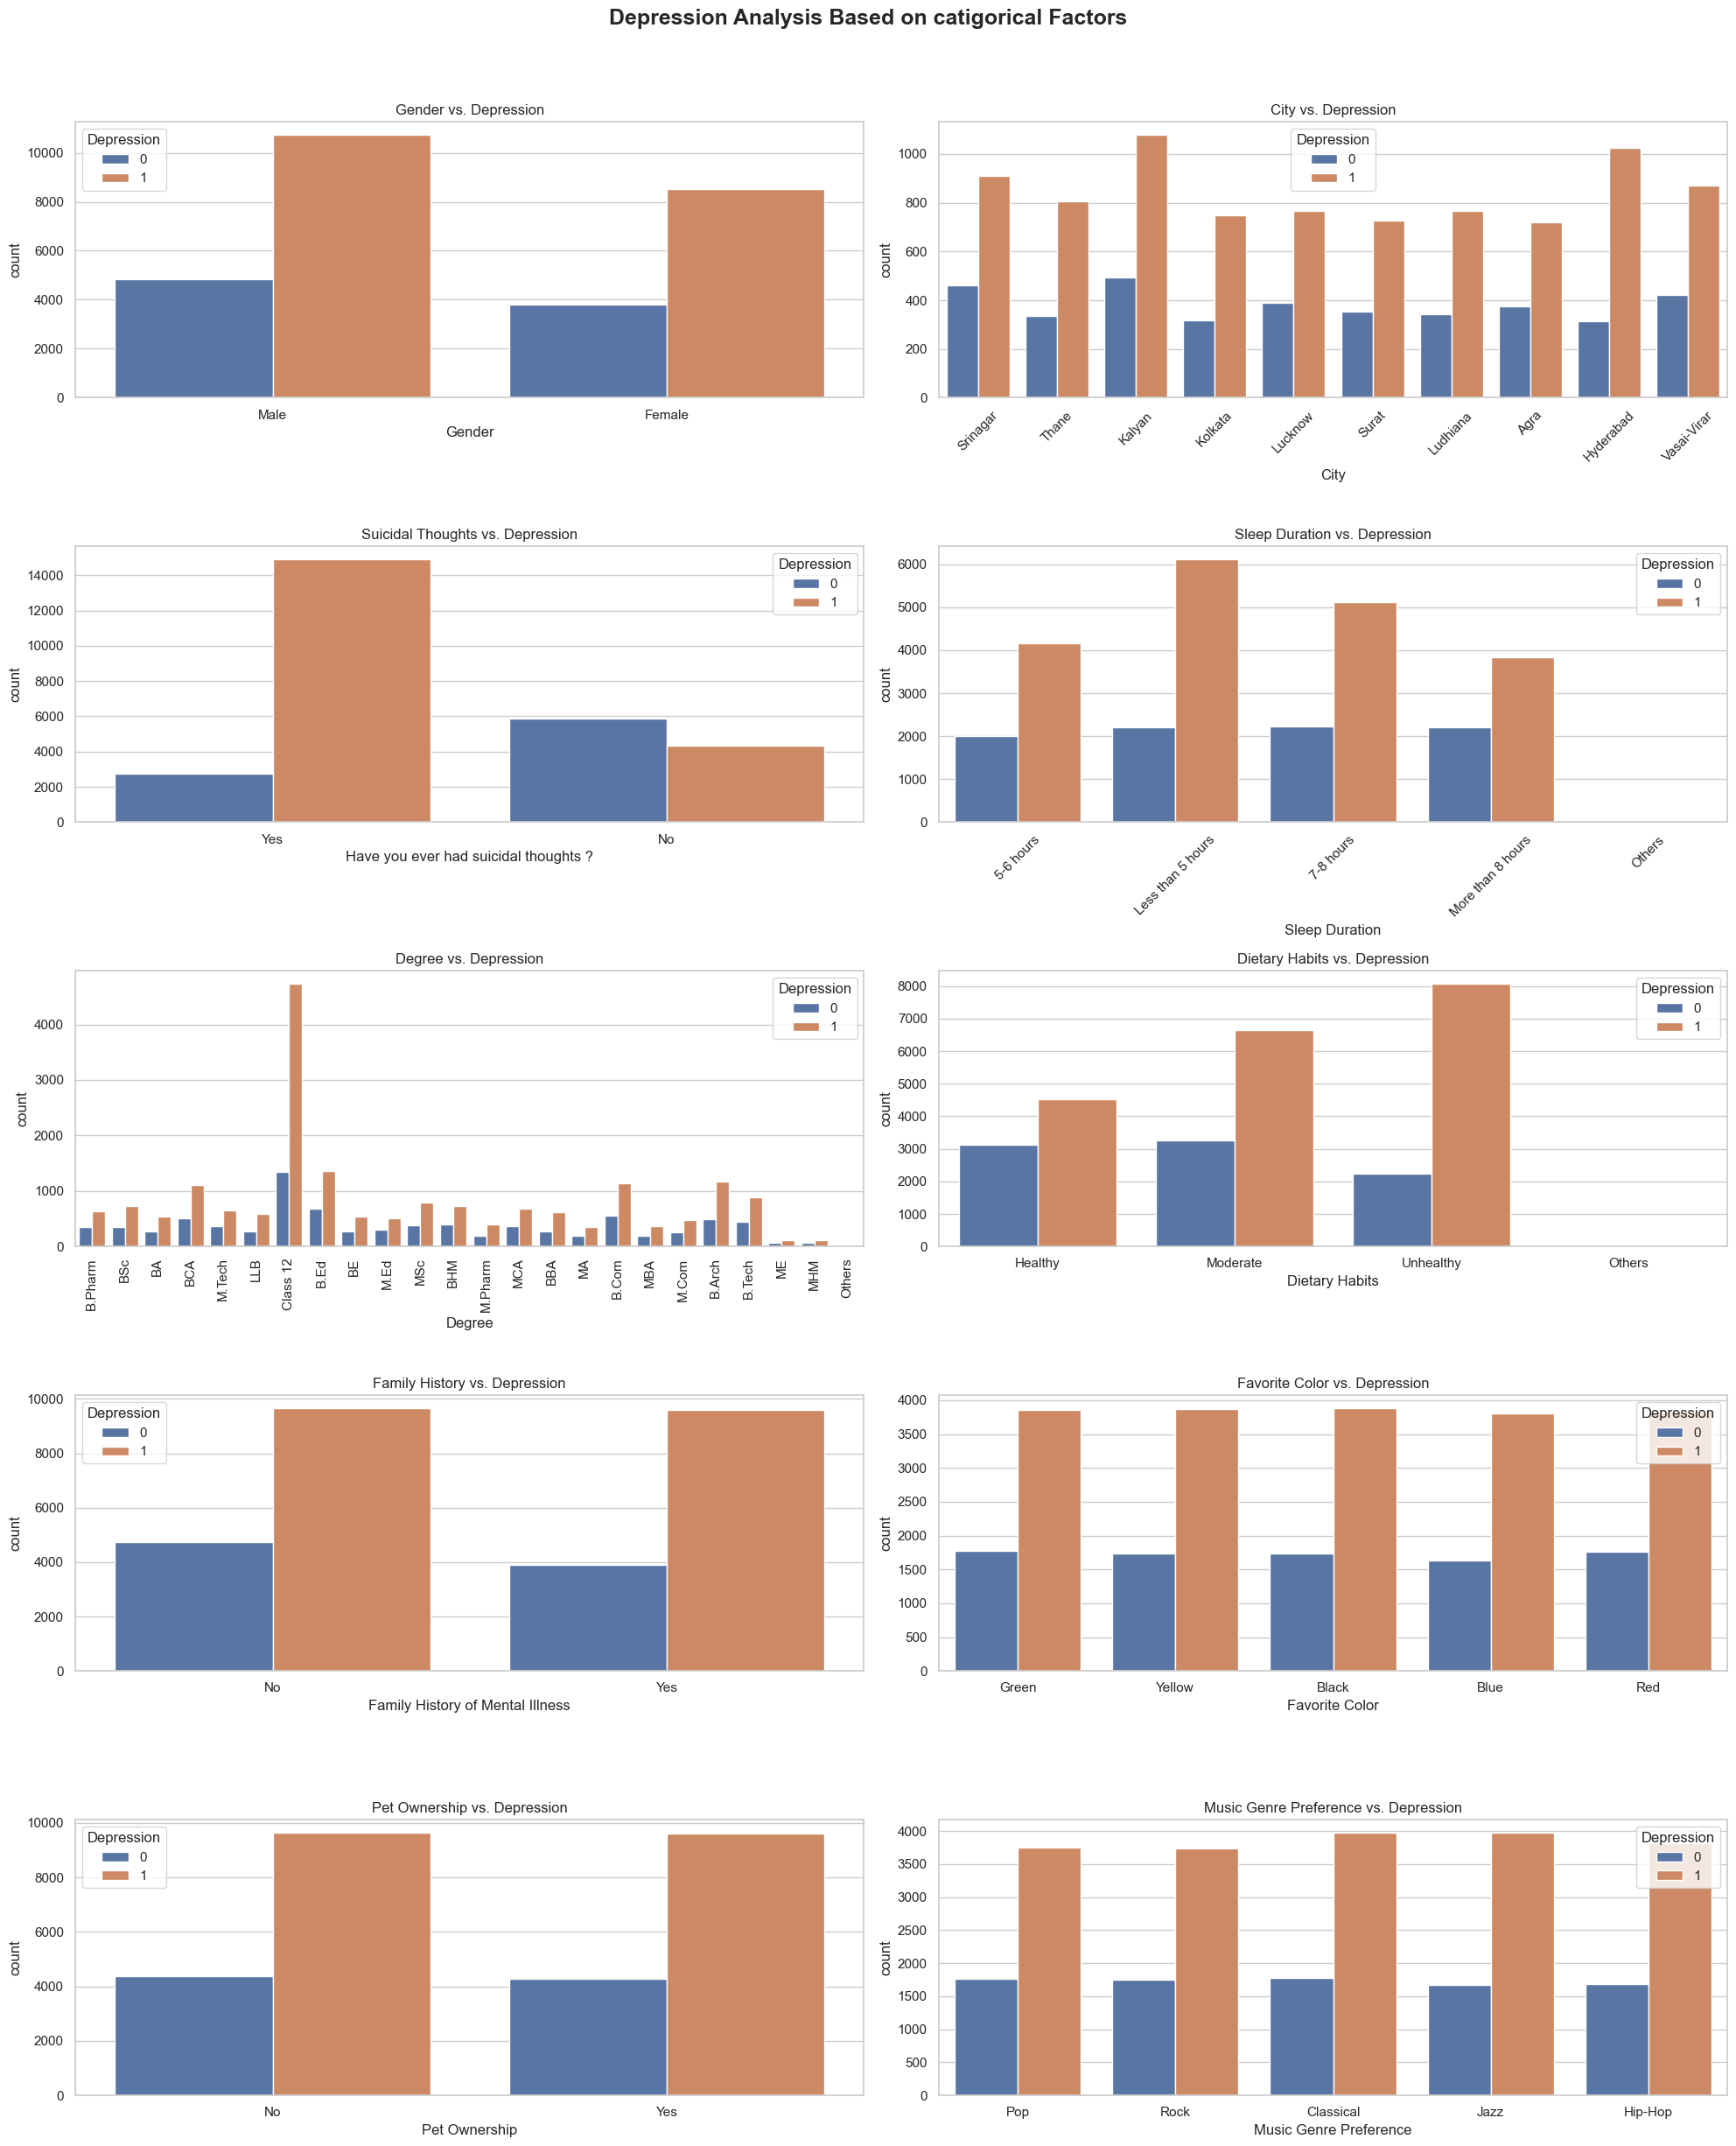

In [141]:
# Set up the figure size and style
sns.set(style="whitegrid")
fig, axes = plt.subplots(5, 2, figsize=(20, 25))  # 5 rows, 3 columns of subplots
fig.suptitle("Depression Analysis Based on catigorical Factors", fontsize=18, fontweight='bold')

# 1. Gender vs. Depression (Bar Chart)
sns.countplot(x="Gender", hue="Depression", data=df, ax=axes[0, 0])
axes[0, 0].set_title("Gender vs. Depression")

# 2. City vs. Depression (Top 10 Cities - Bar Chart)
top_cities = df["City"].value_counts().head(10).index
sns.countplot(x="City", hue="Depression", data=df[df["City"].isin(top_cities)], ax=axes[0, 1])
axes[0, 1].set_title("City vs. Depression")
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Suicidal Thoughts vs. Depression (Stacked Bar Chart)
sns.countplot(x="Have you ever had suicidal thoughts ?", hue="Depression", data=df, ax=axes[1, 0])
axes[1, 0].set_title("Suicidal Thoughts vs. Depression")

# 4. Sleep Duration vs. Depression (Stacked Bar Chart)
sns.countplot(x="Sleep Duration", hue="Depression", data=df, ax=axes[1, 1])
axes[1, 1].set_title("Sleep Duration vs. Depression")
axes[1, 1].tick_params(axis='x', rotation=45)

# 5. Degree vs. Depression (Bar Chart)
sns.countplot(x="Degree", hue="Depression", data=df, ax=axes[2, 0])
axes[2, 0].set_title("Degree vs. Depression")
axes[2, 0].tick_params(axis='x', rotation=90)

# 6. Dietary Habits vs. Depression (Bar Chart)
sns.countplot(x="Dietary Habits", hue="Depression", data=df, ax=axes[2, 1])
axes[2, 1].set_title("Dietary Habits vs. Depression")

# 7. Family History of Mental Illness vs. Depression (Bar Chart)
sns.countplot(x="Family History of Mental Illness", hue="Depression", data=df, ax=axes[3, 0])
axes[3, 0].set_title("Family History vs. Depression")

# 8. Favourite color vs. Depression (Bar Chart)
sns.countplot(x="Favorite Color", hue="Depression", data=df, ax=axes[3, 1])
axes[3, 1].set_title("Favorite Color vs. Depression")

# 9. Pet Ownership vs. Depression (Bar Chart)
sns.countplot(x="Pet Ownership", hue="Depression", data=df, ax=axes[4, 0])
axes[4, 0].set_title("Pet Ownership vs. Depression")

# 10. Music Genre Preference vs. Depression (Bar Chart)
sns.countplot(x="Music Genre Preference", hue="Depression", data=df, ax=axes[4, 1])
axes[4, 1].set_title("Music Genre Preference vs. Depression")

# Adjust layout for readability
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()